In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re
from nltk.probability import FreqDist
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
pd.set_option=("display.max_colwidth",'100')

df1=pd.read_csv("bugzilla_3.csv")
df1.head()

,type,summary,product,comp,assignee,status,resolution,updated
0,NaN,Firefox on Ubuntu New Tab crashes,Core,Widget: Gtk,nobody,UNCO,---,2022-07-11
1,NaN,Enable FIDO CTAP2 support in Firefox nightly ...,Core,DOM: Web Authenticat,nobody,UNCO,---,2022-10-26
2,NaN,Firefox prompts two master password dialogs du...,Toolkit,Password Manager,dlee,UNCO,---,2022-09-28
3,NaN,Global sharing indicator blocks access to menu...,Firefox,Site Permissions,mconley,UNCO,---,2021-08-28
4,NaN,Firefox prioritizes web socket events over loc...,Core,DOM: Networking,nobody,UNCO,---,2021-11-16


In [3]:
df2=df1.drop(['type','resolution','status','assignee'],axis=1)
df2['summary']=df2['summary'].str.lower()
df2.head()
df3=df2
df3

,summary,product,comp,updated
0,firefox on ubuntu new tab crashes,Core,Widget: Gtk,2022-07-11
1,enable fido ctap2 support in firefox nightly ...,Core,DOM: Web Authenticat,2022-10-26
2,firefox prompts two master password dialogs du...,Toolkit,Password Manager,2022-09-28
3,global sharing indicator blocks access to menu...,Firefox,Site Permissions,2021-08-28
4,firefox prioritizes web socket events over loc...,Core,DOM: Networking,2021-11-16
...,...,...,...,...
9995,add gradle support for building gecko binaries...,Firefox Build System,Android Studio and G,2022-10-11
9996,changing the orientation after swiping left a ...,Firefox for iOS,Home screen,2022-10-11
9997,"incorrect focus on ""input"" name fields",Firefox,WebPayments UI,2022-10-11
9998,enable sccache by default when available,Firefox Build System,General,2022-10-11


In [4]:

#removing punctuations from the summary

import string

string.punctuation

#creating a function
def remove_punctuation(txt):
    txt_nopunt="".join([c for c in txt if c not in string.punctuation])
    return txt_nopunt

df3['msg_clean']=df3['summary'].apply(lambda x:remove_punctuation(x))
df3


,summary,product,comp,updated,msg_clean
0,firefox on ubuntu new tab crashes,Core,Widget: Gtk,2022-07-11,firefox on ubuntu new tab crashes
1,enable fido ctap2 support in firefox nightly ...,Core,DOM: Web Authenticat,2022-10-26,enable fido ctap2 support in firefox nightly ...
2,firefox prompts two master password dialogs du...,Toolkit,Password Manager,2022-09-28,firefox prompts two master password dialogs du...
3,global sharing indicator blocks access to menu...,Firefox,Site Permissions,2021-08-28,global sharing indicator blocks access to menu...
4,firefox prioritizes web socket events over loc...,Core,DOM: Networking,2021-11-16,firefox prioritizes web socket events over loc...
...,...,...,...,...,...
9995,add gradle support for building gecko binaries...,Firefox Build System,Android Studio and G,2022-10-11,add gradle support for building gecko binaries...
9996,changing the orientation after swiping left a ...,Firefox for iOS,Home screen,2022-10-11,changing the orientation after swiping left a ...
9997,"incorrect focus on ""input"" name fields",Firefox,WebPayments UI,2022-10-11,incorrect focus on input name fields
9998,enable sccache by default when available,Firefox Build System,General,2022-10-11,enable sccache by default when available


In [5]:
#tokenizing the msg_clean

import re

def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens

df3['summary_tokenized']=df3['msg_clean'].apply(lambda x: tokenize(x.lower()))

df3

,summary,product,comp,updated,msg_clean,summary_tokenized
0,firefox on ubuntu new tab crashes,Core,Widget: Gtk,2022-07-11,firefox on ubuntu new tab crashes,"[firefox, on, ubuntu, new, tab, crashes, ]"
1,enable fido ctap2 support in firefox nightly ...,Core,DOM: Web Authenticat,2022-10-26,enable fido ctap2 support in firefox nightly ...,"[enable, fido, ctap2, support, in, firefox, ni..."
2,firefox prompts two master password dialogs du...,Toolkit,Password Manager,2022-09-28,firefox prompts two master password dialogs du...,"[firefox, prompts, two, master, password, dial..."
3,global sharing indicator blocks access to menu...,Firefox,Site Permissions,2021-08-28,global sharing indicator blocks access to menu...,"[global, sharing, indicator, blocks, access, t..."
4,firefox prioritizes web socket events over loc...,Core,DOM: Networking,2021-11-16,firefox prioritizes web socket events over loc...,"[firefox, prioritizes, web, socket, events, ov..."
...,...,...,...,...,...,...
9995,add gradle support for building gecko binaries...,Firefox Build System,Android Studio and G,2022-10-11,add gradle support for building gecko binaries...,"[add, gradle, support, for, building, gecko, b..."
9996,changing the orientation after swiping left a ...,Firefox for iOS,Home screen,2022-10-11,changing the orientation after swiping left a ...,"[changing, the, orientation, after, swiping, l..."
9997,"incorrect focus on ""input"" name fields",Firefox,WebPayments UI,2022-10-11,incorrect focus on input name fields,"[incorrect, focus, on, input, name, fields, ]"
9998,enable sccache by default when available,Firefox Build System,General,2022-10-11,enable sccache by default when available,"[enable, sccache, by, default, when, available, ]"


In [9]:
#importing nltk to remove stopwords from the summary_tokenized

import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

def remove_stopwords(txt_tokenized):
    txt_clean=[word for word in txt_tokenized if word not in stopwords]
    return txt_clean


df3['no_swds']=df3['summary_tokenized'].apply(lambda x: remove_stopwords(x))
df3

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yousu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,summary,product,comp,updated,msg_clean,summary_tokenized,no_swds,lemmatized_wrds,lemmatized_str
0,firefox on ubuntu new tab crashes,Core,Widget: Gtk,2022-07-11,firefox on ubuntu new tab crashes,"[firefox, on, ubuntu, new, tab, crashes, ]","[firefox, ubuntu, new, tab, crashes, ]","[firefox, ubuntu, new, tab, crash, ]",firefox ubuntu new tab crash
1,enable fido ctap2 support in firefox nightly ...,Core,DOM: Web Authenticat,2022-10-26,enable fido ctap2 support in firefox nightly ...,"[enable, fido, ctap2, support, in, firefox, ni...","[enable, fido, ctap2, support, firefox, nightl...","[enable, fido, ctap2, support, firefox, nightl...",enable fido ctap2 support firefox nightly
2,firefox prompts two master password dialogs du...,Toolkit,Password Manager,2022-09-28,firefox prompts two master password dialogs du...,"[firefox, prompts, two, master, password, dial...","[firefox, prompts, two, master, password, dial...","[firefox, prompt, two, master, password, dialo...",firefox prompt two master password dialog star...
3,global sharing indicator blocks access to menu...,Firefox,Site Permissions,2021-08-28,global sharing indicator blocks access to menu...,"[global, sharing, indicator, blocks, access, t...","[global, sharing, indicator, blocks, access, m...","[global, sharing, indicator, block, access, me...",global sharing indicator block access menu macos
4,firefox prioritizes web socket events over loc...,Core,DOM: Networking,2021-11-16,firefox prioritizes web socket events over loc...,"[firefox, prioritizes, web, socket, events, ov...","[firefox, prioritizes, web, socket, events, lo...","[firefox, prioritizes, web, socket, event, loc...",firefox prioritizes web socket event location ...
...,...,...,...,...,...,...,...,...,...
9995,add gradle support for building gecko binaries...,Firefox Build System,Android Studio and G,2022-10-11,add gradle support for building gecko binaries...,"[add, gradle, support, for, building, gecko, b...","[add, gradle, support, building, gecko, binari...","[add, gradle, support, building, gecko, binary, ]",add gradle support building gecko binary
9996,changing the orientation after swiping left a ...,Firefox for iOS,Home screen,2022-10-11,changing the orientation after swiping left a ...,"[changing, the, orientation, after, swiping, l...","[changing, orientation, swiping, left, home, p...","[changing, orientation, swiping, left, home, p...",changing orientation swiping left home panel i...
9997,"incorrect focus on ""input"" name fields",Firefox,WebPayments UI,2022-10-11,incorrect focus on input name fields,"[incorrect, focus, on, input, name, fields, ]","[incorrect, focus, input, name, fields, ]","[incorrect, focus, input, name, field, ]",incorrect focus input name field
9998,enable sccache by default when available,Firefox Build System,General,2022-10-11,enable sccache by default when available,"[enable, sccache, by, default, when, available, ]","[enable, sccache, default, available, ]","[enable, sccache, default, available, ]",enable sccache default available


In [38]:
#Lemmatizing the no_swds column to get the root word 'Lemma' 


nltk.download('wordnet')
nltk.download('omw-1.4')
wn=nltk.WordNetLemmatizer()


def lemmatization(token_txt):
    text=[wn.lemmatize(word) for word in token_txt]
    return text

df3['lemmatized_wrds']=df3['no_swds'].apply(lambda x: lemmatization(x))
df3['lemmatized_str'] = df3['lemmatized_wrds'].apply(lambda x: ' '.join(x))
df3.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yousu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yousu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,summary,product,comp,updated,msg_clean,summary_tokenized,no_swds,lemmatized_wrds,lemmatized_str
0,firefox on ubuntu new tab crashes,Core,Widget: Gtk,2022-07-11,firefox on ubuntu new tab crashes,"[firefox, on, ubuntu, new, tab, crashes, ]","[firefox, ubuntu, new, tab, crashes, ]","[firefox, ubuntu, new, tab, crash, ]",firefox ubuntu new tab crash
1,enable fido ctap2 support in firefox nightly ...,Core,DOM: Web Authenticat,2022-10-26,enable fido ctap2 support in firefox nightly ...,"[enable, fido, ctap2, support, in, firefox, ni...","[enable, fido, ctap2, support, firefox, nightl...","[enable, fido, ctap2, support, firefox, nightl...",enable fido ctap2 support firefox nightly
2,firefox prompts two master password dialogs du...,Toolkit,Password Manager,2022-09-28,firefox prompts two master password dialogs du...,"[firefox, prompts, two, master, password, dial...","[firefox, prompts, two, master, password, dial...","[firefox, prompt, two, master, password, dialo...",firefox prompt two master password dialog star...
3,global sharing indicator blocks access to menu...,Firefox,Site Permissions,2021-08-28,global sharing indicator blocks access to menu...,"[global, sharing, indicator, blocks, access, t...","[global, sharing, indicator, blocks, access, m...","[global, sharing, indicator, block, access, me...",global sharing indicator block access menu macos
4,firefox prioritizes web socket events over loc...,Core,DOM: Networking,2021-11-16,firefox prioritizes web socket events over loc...,"[firefox, prioritizes, web, socket, events, ov...","[firefox, prioritizes, web, socket, events, lo...","[firefox, prioritizes, web, socket, event, loc...",firefox prioritizes web socket event location ...


In [18]:
# Create a TfidfVectorizer with min_df=2 and max_features=5000
vectorizer = TfidfVectorizer(min_df=4, max_features=20000)
# Define the word to be dropped
word_to_drop = 'firefox'

lemmatized_str=df3['lemmatized_str']

# Create a TfidfVectorizer with the word to be dropped added to the stop words list
vectorizer = TfidfVectorizer(stop_words=[word_to_drop])
# Fit the vectorizer to your data
vectorizer.fit(lemmatized_str)

# Transform the data into a TF-IDF matrix
tfidf_matrix = vectorizer.transform(lemmatized_str)

# Get the vocabulary
vocabulary = vectorizer.vocabulary_

# Print the TF-IDF matrix in key-value pair format
for i in range(len(df3)):
    print(f"Document {i+1}:")
    for word, index in vocabulary.items():
        tfidf_score = tfidf_matrix[i, index]
        if tfidf_score > 0:
            print(f"{word}: {tfidf_score:.4f}")


Document 1:
ubuntu: 0.6314
new: 0.4390
tab: 0.3385
crash: 0.5422
Document 2:
enable: 0.3722
fido: 0.5693
ctap2: 0.5693
support: 0.3156
nightly: 0.3371
Document 3:
prompt: 0.4094
two: 0.4117
master: 0.5142
password: 0.3638
dialog: 0.3273
startup: 0.3988
Document 4:
global: 0.4346
sharing: 0.4295
indicator: 0.3881
block: 0.3822
access: 0.3857
menu: 0.2504
macos: 0.3443
Document 5:
prioritizes: 0.5599
web: 0.3083
socket: 0.5191
event: 0.3340
location: 0.3491
change: 0.2975
Document 6:
tab: 0.1345
e10smulti: 0.3839
55: 0.3742
break: 0.2777
session: 0.2271
high: 0.2640
number: 0.2796
process: 0.2547
cause: 0.2203
critical: 0.3964
dataloss: 0.3839
Document 7:
tab: 0.2666
show: 0.3881
favicons: 0.6530
immediately: 0.5932
Document 8:
glibgobjectcritical: 0.8146
starting: 0.5800
Document 9:
tab: 0.1983
57: 0.4510
video: 0.3383
lag: 0.4903
content: 0.3190
loaded: 0.4107
background: 0.3634
Document 10:
video: 0.4939
load: 0.4939
fully: 0.7157
Document 11:
icon: 0.3242
look: 0.4238
pixelated: 0.58

In [39]:
from sklearn.cluster import KMeans

# Use KMeans to cluster the data into 5 clusters
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

# Get the cluster labels for each document
cluster_labels = km.labels_

# Print the cluster labels for each document
for i, label in enumerate(cluster_labels):
    print(f"Document {i+1} belongs to cluster {label}")


Document 1 belongs to cluster 1
Document 2 belongs to cluster 0
Document 3 belongs to cluster 0
Document 4 belongs to cluster 0
Document 5 belongs to cluster 0
Document 6 belongs to cluster 1
Document 7 belongs to cluster 1
Document 8 belongs to cluster 0
Document 9 belongs to cluster 1
Document 10 belongs to cluster 0
Document 11 belongs to cluster 0
Document 12 belongs to cluster 0
Document 13 belongs to cluster 0
Document 14 belongs to cluster 0
Document 15 belongs to cluster 2
Document 16 belongs to cluster 2
Document 17 belongs to cluster 0
Document 18 belongs to cluster 0
Document 19 belongs to cluster 0
Document 20 belongs to cluster 0
Document 21 belongs to cluster 0
Document 22 belongs to cluster 2
Document 23 belongs to cluster 1
Document 24 belongs to cluster 2
Document 25 belongs to cluster 0
Document 26 belongs to cluster 2
Document 27 belongs to cluster 0
Document 28 belongs to cluster 0
Document 29 belongs to cluster 0
Document 30 belongs to cluster 0
Document 31 belongs

Word cloud for cluster 0:


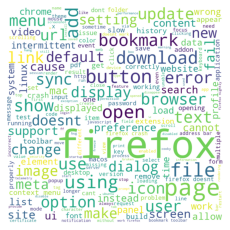

Word cloud for cluster 1:


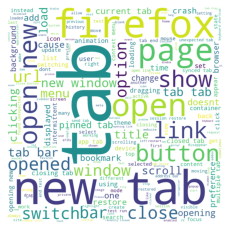

Word cloud for cluster 2:


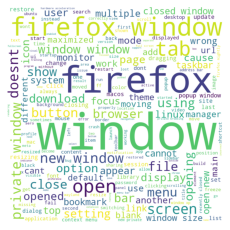

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define function to generate word clouds
def generate_wordcloud(cluster_label):
    # Get all documents in the cluster
    cluster_docs = df3[cluster_labels == cluster_label]['lemmatized_str'].values
    # Combine all documents into a single string
    cluster_text = ' '.join(cluster_docs)
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords).generate(cluster_text)
    # Plot the word cloud
    plt.figure(figsize=(3, 3), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

# Generate word clouds for each cluster
for i in range(3):
    print(f"Word cloud for cluster {i}:")
    generate_wordcloud(i)


In [47]:
from sklearn.cluster import KMeans

# set number of clusters
n_clusters = 3

# create KMeans clustering object
kmeans = KMeans(n_clusters=n_clusters, random_state=49)

# fit KMeans clustering model to the tfidf_matrix
kmeans.fit(tfidf_matrix)

# get cluster labels for each row in the tfidf_matrix
df3['cluster_labels'] = kmeans.labels_

# print number of rows in each cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
print(dict(zip(unique, counts)))


{0: 903, 1: 7983, 2: 1114}


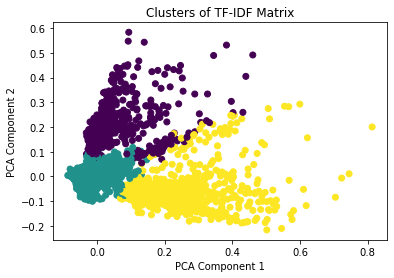

In [48]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# set number of clusters
n_clusters = 3

# create KMeans clustering object
kmeans = KMeans(n_clusters=n_clusters, random_state=49)

# fit KMeans clustering model to the tfidf_matrix
kmeans.fit(tfidf_matrix)

# get cluster labels for each row in the tfidf_matrix
cluster_labels = kmeans.labels_

# apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca.fit(tfidf_matrix.toarray())
pca_2d = pca.transform(tfidf_matrix.toarray())

# create scatter plot with different colors for each cluster
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters of TF-IDF Matrix")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [62]:
df4=df3.drop(['msg_clean','summary_tokenized','no_swds'],axis=1)
df4 = df4.sort_values(by='cluster_labels')
df4.head(50)


,summary,product,comp,updated,lemmatized_wrds,lemmatized_str,cluster_labels
4991,prefs.js creation causing 2 firefox windows wi...,Toolkit,Startup and Profile,2022-10-11,"[prefsjs, creation, causing, 2, firefox, windo...",prefsjs creation causing 2 firefox window cust...,0
1321,firefox headless fails to run on windows when ...,Firefox,Headless,2022-10-11,"[firefox, headless, fails, run, window, run, s...",firefox headless fails run window run system,0
1319,"firefox option ""...from last session"" forces w...",Core,Widget: Gtk,2022-10-11,"[firefox, option, last, session, force, window...",firefox option last session force window unmin...,0
6121,firefox windows (arm64) consistently hangs. ...,Firefox,General,Tue 03:25,"[firefox, window, arm64, consistently, hang, ]",firefox window arm64 consistently hang,0
6120,firefox won't start loading until its window i...,Firefox,General,2022-11-02,"[firefox, wont, start, loading, window, visibl...",firefox wont start loading window visible screen,0
3914,all tabs lost when closing window while view s...,Firefox,Session Restore,2022-09-26,"[tab, lost, closing, window, view, source, win...",tab lost closing window view source window sti...,0
1306,start firefox in maximum window mode result in...,Core,Widget: Gtk,2022-10-11,"[start, firefox, maximum, window, mode, result...",start firefox maximum window mode result small...,0
6111,firefox causes intel driver to stop working (w...,Core,Graphics,2022-11-02,"[firefox, cause, intel, driver, stop, working,...",firefox cause intel driver stop working window...,0
8672,theme applies while previewing from amo and cl...,Firefox,Theme,2022-10-11,"[theme, applies, previewing, amo, closing, win...",theme applies previewing amo closing window,0
6109,private window doesn't follow system theme in ...,Firefox,General,Wed 01:05,"[private, window, doesnt, follow, system, them...",private window doesnt follow system theme fire...,0
